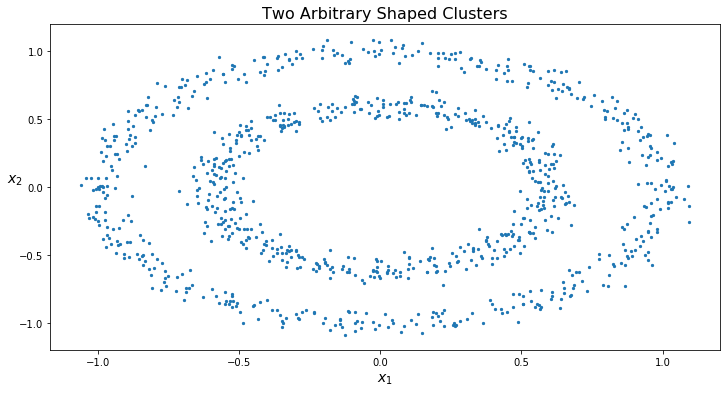

init


array([ -1.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147.])

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans

# blob_centers = np.array(
#     [[0.2, 2.3],
#      [-1.5, 2.3],
#      [-2.8, 1.8],
#      [-2.8, 2.8],
#      [-2.8, 1.3]])
# 
# blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# class Kmeans:
#     def __init__(self):
#         print("A")
# 
#     def fit(self, X, K, n_init, max_iter=300, tol=1e-4, distance_metric="euclidean"):
#         labels = []
#         num_cluster_num = K
#         # Get the cluster centroids
#         num_data_point = len(X)
#         random_num = np.random.randint(num_data_point, size=1)
#         centroid = [X[random_num]]
#         for k in range(1, num_cluster_num):
#             distance = []
#             distribution_proportion = []
#             for n in num_data_point:
#                 if distance_metric == "euclidean":
#                     distance.append(np.min([(euclidean_metrics(X[n], centroid[i])) for i in k]))
#             
#             total_distance = np.sum(distance)
#             for n in num_data_point:
#                 distribution_proportion.append((np.square(distance[n]))/total_distance)
#                 
#             index_max_dp = np.where(distribution_proportion == np.max(distribution_proportion))
#             centroid[k] = X[index_max_dp]
#         
#         # Getting labels
#         for n in num_data_point:
#             distance_dp_centroid = [euclidean_metrics(X[n], centroid[k]) for k in num_cluster_num]
#             cluster = np.where(distance_dp_centroid == np.min(distance_dp_centroid))
#             labels.append(cluster)    
#             
#         return labels
# 
#     def score(self, X):
#         return 0.0

class DBSCAN:
    def __init__(self):
        print("init")
        
    def fit(self, X, eps, min_samples, distance_metric="euclidean"):
        cluster_num = 0
        undefined = -2
        noise = -1
        labels = np.empty(len(X))
        labels.fill(undefined)
        
        for index in range(len(X)):
            if labels[index] != undefined:
                continue
            neighbors = self.RangeQuery(X, distance_metric, X[index], eps)
            if np.abs(len(neighbors)) < min_samples:
                labels[index] = noise
                continue
                    
            cluster_num += 1
            labels[index] = cluster_num
                
            for i in neighbors:
                if labels[i] == noise:
                    labels[i] = cluster_num
                        
                if labels[i] != undefined:
                    continue
                        
                labels[i] = cluster_num
                nb = self.RangeQuery(X, distance_metric, X[i], eps)
                if np.abs(len(nb)) >= min_samples:
                    np.union1d(neighbors, nb)
            
        return labels
        
    def RangeQuery(self, X, distance_metric, p, eps):
        neighbors_indices = []
        if distance_metric == "euclidean":
            for index in range(len(X)):
                if euclidean_metrics(X[index], p) <= eps:
                    neighbors_indices.append(index)
                
        return neighbors_indices
    
def euclidean_metrics(x, y):
    distance_xy = np.square(np.subtract(x, y))
    sum_distance = np.sum(distance_xy)

    return np.sqrt(sum_distance)


def intra_cluster_distance(x, labels, i):
    same_cluster_indices = np.where(labels == labels[i])[0]
    if len(same_cluster_indices) == 0:
        a = 0
    else:
        distance = []
        for j in same_cluster_indices:
            if j != i:
                distance.append(euclidean_metrics(x[i], x[j]))
        a = np.mean(distance)

    return a


def nearest_cluster_distance(x, labels, i):
    different_cluster_indices = np.where(labels != labels[i])[0]
    if len(different_cluster_indices) == 0:
        b = 0
    else:
        distance_dict = {}
        for j in different_cluster_indices:
            key = labels[j]
            if key in distance_dict.keys():
                distance_dict[key].append(euclidean_metrics(x[i], x[j]))
            else:    
                distance_dict.update({key: [euclidean_metrics(x[i], x[j])]})
        
        mean_distance = []
        for row in distance_dict.values():
            mean_distance.append([np.mean(row)])
        
        min_mean_distance = np.min(mean_distance)
        b = min_mean_distance
    return b


def silhouette_score(x, labels):

    a = []
    b = []
    score = []
    for i in range(len(labels)):
        a.append(intra_cluster_distance(x, labels, i))
        b.append(nearest_cluster_distance(x, labels, i))
        score.append((b[i] - a[i]) / (np.maximum(a[i], b[i])))

    return np.mean(score)


# ### here start K means
# x, y = make_blobs(n_samples=2000, centers=blob_centers,
#                     cluster_std=blob_std, random_state=7)
# 
# # kmeans = KMeans()
# # kmeans.fit()
# 
# kmeans_per_k = [KMeans(n_cluster_num=k, random_state=42).fit(x)
#                     for k in range(1, 10)]
# 
# # getting the silhouette score
# silhouette_scores = [silhouette_score(x, model.labels_)
#                         for model in kmeans_per_k[1:]]
# 
# plt.figure(figsize=(10, 4))
# plt.plot(range(2, 10), silhouette_scores, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# plt.show()


# ### here start DBSCAN

X, y = make_circles(n_samples=1000, noise=0.05, factor=0.6)

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=5, cmap='autumn')

plt.title("Two Arbitrary Shaped Clusters", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()


dbscan = DBSCAN()


#print(dbscan.labels_)
np.unique(dbscan.fit(X, eps=0.05, min_samples=5, distance_metric="euclidean"))